In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

plt.rcParams['lines.linewidth'] = 2
plt.rcParams['figure.dpi'] = 500 # Resolution of figures
plt.rcParams["figure.autolayout"] = True
plt.rcParams["legend.loc"] = 'best'
plt.rcParams['xtick.labelsize']=18
plt.rcParams['ytick.labelsize']=18

In [42]:
KEGG_df = pd.read_parquet("../data/interim/enzymemap_Kegg_JN_mapped.parquet")
KEGG_df['top_mapped_operator'] = KEGG_df['top_mapped_operator'].fillna("None")

MetaCyc_df = pd.read_parquet("../data/interim/enzymemap_MetaCyc_JN_mapped.parquet")
MetaCyc_df['top_mapped_operator'] = MetaCyc_df['top_mapped_operator'].fillna("None")

In [44]:
def extract_rule_num(x):
    if x == "None":
        return np.inf   # sort None last
    m = re.search(r'rule(\d+)', x)
    return int(m.group(1)) if m else np.inf

In [51]:
unique_rules = sorted(
    KEGG_df['top_mapped_operator'].unique(),
    key=extract_rule_num
)

first_50_numeric = [r for r in unique_rules if r != "None"][:50]

# insert None at the end
final_order = ["None"] + first_50_numeric

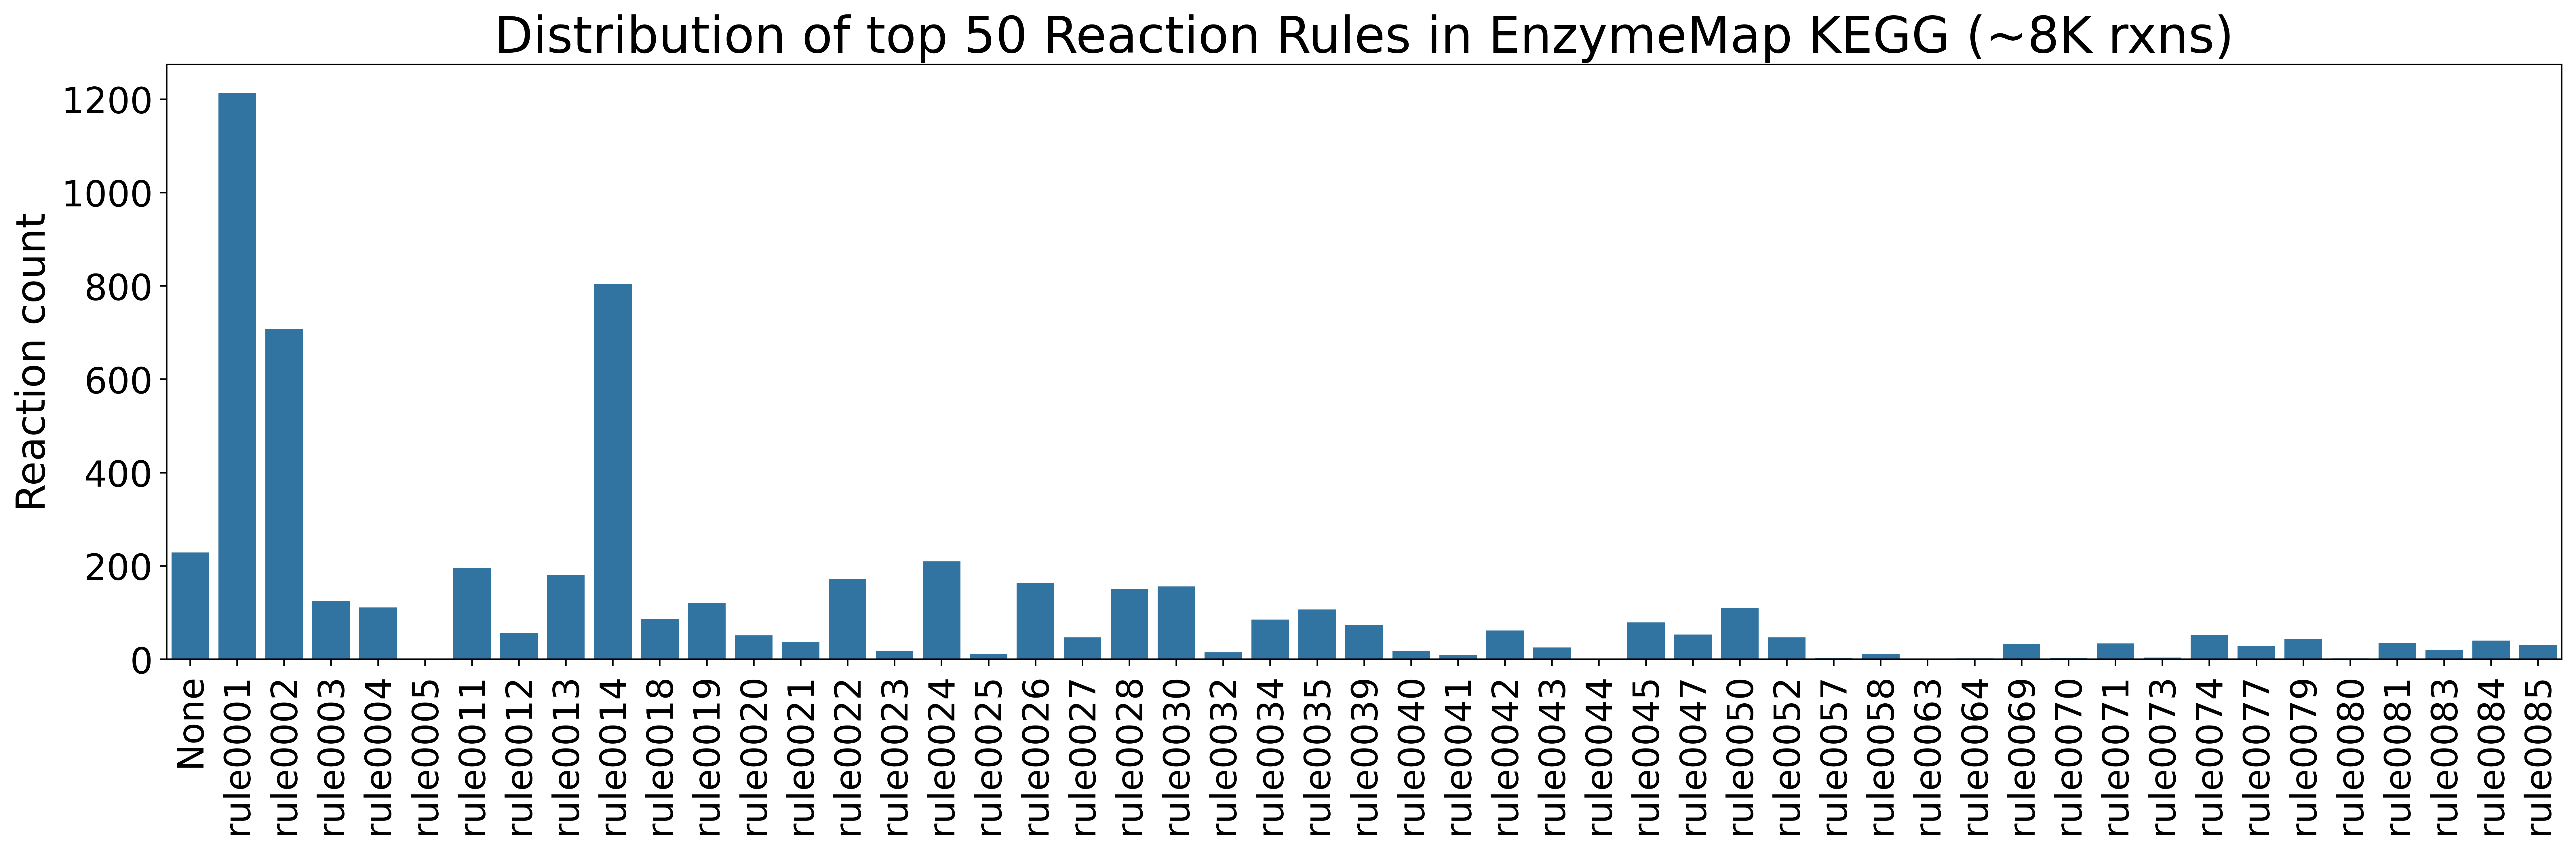

In [63]:
plt.figure(figsize=(18,6))
sns.countplot(
    data=KEGG_df[KEGG_df['top_mapped_operator'].isin(final_order)],
    x='top_mapped_operator',
    order=final_order
)

plt.xticks(rotation=90)
plt.ylabel("Reaction count", size = 20)
plt.xlabel('')
plt.title("Distribution of top 50 Reaction Rules in EnzymeMap KEGG (~8K rxns)", size = 25)
plt.tight_layout()
plt.show()